In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
path1 = "https://raw.githubusercontent.com/VoronkaAlexandr/Sars_Cov_2_MutSpec/main/Sars_Cov_2/new_data/data_obtained/MutChange_12spec_normed_nmut.csv"
path2 = "https://raw.githubusercontent.com/VoronkaAlexandr/Sars_Cov_2_MutSpec/main/Sars_Cov_2/new_data/data_obtained/MutChange_12spec_normed_one.csv"

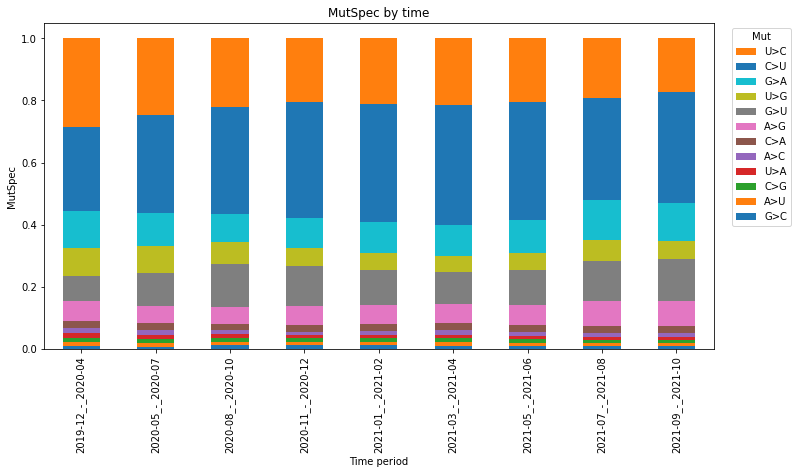

In [96]:
mutspec = pd.read_csv(path2, index_col=0)
df_plot = mutspec.pivot("variable", "NucSubst", "value")
df_plot = df_plot.iloc[:, np.argsort(df_plot.values[0])]

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
df_plot.plot(kind='bar', stacked=True, ax=ax, )  # colormap="turbo"
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Mut', loc='upper left', bbox_to_anchor=(1.02,1))
ax.set_xlabel("Time period")
ax.set_ylabel("MutSpec")
ax.set_title("MutSpec by time");
fig.savefig("../figures/mutspec_by_time.jpg", bbox_inches="tight", pad_inches=.5);